In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# error_bad_lines=False #加入参数
df_2018 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv")
df_2019 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv")
df_2020 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv")
df_2021 = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021.csv")

# 将四个数据框合并为一个
frames = [df_2018, df_2019, df_2020, df_2021]
df = pd.concat(frames)

In [3]:
len(df)

8846265

In [4]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,Capital/Adirond,Columbia,1001000.0,146.0,Columbia Memorial Hospital,50 to 69,125,F,White,Not Span/Hispanic,2,Elective,Short-term Hospital,2018,CIR020,CEREBRAL INFARCTION,NaN,NaN,45.0,CVA & PRECEREBRAL OCCLUSION W INFARCT,1.0,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,3.0,Major,Major,Medical,"Managed Care, Unspecified",Self-Pay,NaN,NaN,True,"17,591.41","3,570.06"
1,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,16,Emergency,Short-term Hospital,2018,RSP017,POSTPROCEDURAL OR POSTOPERATIVE RESPIRATORY SY...,ESA003,MECHANICAL VENTILATION,121.0,OTHER RESPIRATORY & CHEST PROCEDURES,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,4.0,Extreme,Extreme,Surgical,Medicare,Medicaid,NaN,NaN,True,"106,190.21","78,913.24"
2,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53"
3,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,18 to 29,112,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,CIR017,CARDIAC DYSRHYTHMIAS,IMG008,ULTRASONOGRAPHY,201.0,CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,2.0,Moderate,Minor,Medical,Medicaid,Medicaid,NaN,NaN,True,"15,965.54","11,341.3"
4,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,0 to 17,104,M,Multi-racial,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,RSP002,PNEUMONIA (EXCEPT THAT CAUSED BY TUBERCULOSIS),NaN,NaN,139.0,OTHER PNEUMONIA,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3.0,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,True,"36,846.83","10,240.02"


In [5]:
df_ = df[df['APR MDC Description'] != 
         'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD']

In [6]:
df_1 = df_[df_['APR MDC Description'] != 
         'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM']

In [7]:
len(df_1)

7079048

In [8]:
df_1['APR MDC Description'].value_counts()

DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM                                            1102440
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM                                             799045
DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE                   747865
DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM                                               681588
INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)                            626438
DISEASES AND DISORDERS OF THE NERVOUS SYSTEM                                                 583952
MENTAL DISEASES AND DISORDERS                                                                411599
DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT                                       381808
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS                                  302834
ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS                           277258


---

### 饼状图

In [9]:
counts = df_1['APR MDC Description'].value_counts()


total = sum(counts)

circulatory_system  = counts['DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM']
respiratory_system  = counts['DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM']
musculoskeletal_system_connective_tissue = counts['DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE']
digestive_system = counts['DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM']
infectious_parasitic_diseases = counts['INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)']
mental_diseases = counts['DISEASES AND DISORDERS OF THE NERVOUS SYSTEM']+counts['MENTAL DISEASES AND DISORDERS']+counts['ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS']
others = total - circulatory_system -respiratory_system - musculoskeletal_system_connective_tissue - digestive_system - infectious_parasitic_diseases - mental_diseases

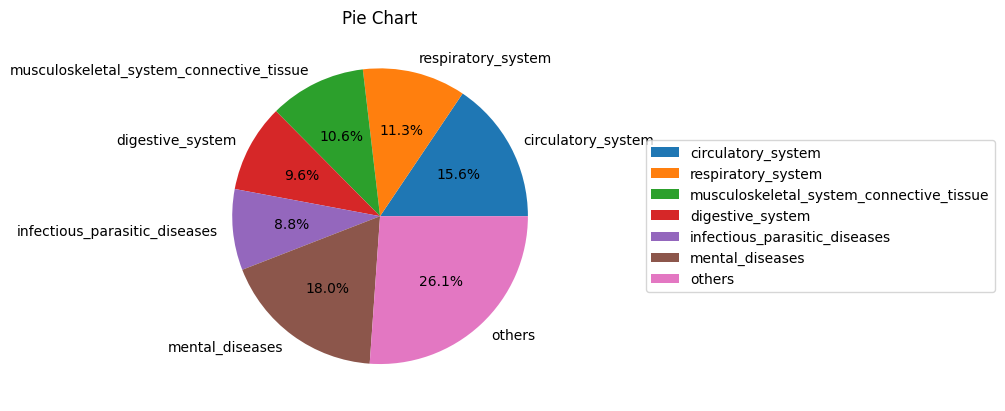

In [10]:
s = pd.Series([circulatory_system, respiratory_system, musculoskeletal_system_connective_tissue, digestive_system, infectious_parasitic_diseases,mental_diseases,others], index=['circulatory_system', 'respiratory_system', 'musculoskeletal_system_connective_tissue', 'digestive_system', 'infectious_parasitic_diseases','mental_diseases','others'])

ax = s.plot.pie(y='length', labels=s.index, autopct='%1.1f%%')
# 添加标题
ax.set_title('Pie Chart')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# 显示图形
plt.show()

In [11]:
df_ny = df_1[df_1['Hospital Service Area']=='New York City']

In [12]:
len(df_ny)

3106076

In [13]:
df_ny['Facility Name'].unique()

array(['Harlem Hospital Center', 'Kings County Hospital Center',
       'New York-Presbyterian Hospital - Columbia Presbyterian Center',
       'Maimonides Medical Center', 'Long Island Jewish Medical Center',
       'Montefiore Medical Center - Henry & Lucy Moses Div',
       'Memorial Hospital for Cancer and Allied Diseases',
       'University Hospital of Brooklyn', 'Queens Hospital Center',
       'Montefiore Medical Center-Wakefield Hospital',
       'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div',
       "Cohen Children's Medical Center", 'Mount Sinai Beth Israel',
       'Richmond University Medical Center',
       'New York-Presbyterian Hospital - New York Weill Cornell Center',
       'BronxCare Hospital Center', 'Jamaica Hospital Medical Center',
       'Staten Island University Hosp-North',
       "Staten Island University Hospital Prince's Bay",
       'New York - Presbyterian/Queens', 'NYU Langone Hospitals',
       'Flushing Hospital Medical Center'

In [14]:
len(df_ny['Facility Name'].unique())

57

In [15]:
df_ny['Zip Code - 3 digits'].unique()

array(['100', '112', '104', '114', '113', '115', '103', '117', 'OOS',
       '118', '109', '105', '110', '125', '124', '119', '116', '111', nan,
       '101', '107', '108', '106', '146', '121', '132', '127', '129',
       '138', '126', '120', '133', '122', '137', '139', '123', '148',
       '147', '134', '140', '128', '136', '142', '130', '131', '135',
       '144', '149', '145', '143', '141'], dtype=object)

In [16]:
len(df_ny['Zip Code - 3 digits'].unique())

51

In [17]:
df_ny['Race'].unique()

array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)

In [18]:
df_ny['Hospital County'].unique()

array(['Manhattan', 'Kings', 'Queens', 'Bronx', 'Richmond'], dtype=object)

In [19]:
len(df_ny['Hospital County'].unique())

5

In [20]:
# 读取 Excel 文件，指定 sheet 名称或索引
df_zipcode = pd.read_excel('data dive.xlsx')

# 打印 dataframe
df_zipcode.head()

,Facility Name,zip code
0,Harlem Hospital Center,10037
1,Kings County Hospital Center,11203
2,Memorial Hospital for Cancer and Allied Diseases,10065
3,Queens Hospital Center,11432
4,Long Island Jewish Medical Center,11040


In [21]:
merged_df = pd.merge(df_ny, df_zipcode, left_on='Facility Name', right_on='Facility Name')
merged_df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,zip code
0,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,16,Emergency,Short-term Hospital,2018,RSP017,POSTPROCEDURAL OR POSTOPERATIVE RESPIRATORY SY...,ESA003,MECHANICAL VENTILATION,121.0,OTHER RESPIRATORY & CHEST PROCEDURES,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,4.0,Extreme,Extreme,Surgical,Medicare,Medicaid,NaN,NaN,True,"106,190.21","78,913.24",10037
1,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53",10037
2,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,CIR012,NONSPECIFIC CHEST PAIN,NaN,NaN,203.0,CHEST PAIN,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,1.0,Minor,Minor,Medical,Medicare,Medicaid,NaN,NaN,True,"12,290.21","9,133.24",10037
3,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,18 to 29,100,F,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2018,GEN006,OTHER SPECIFIED AND UNSPECIFIED DISEASES OF KI...,URN003,URETER AND OTHER URINARY TRACT DILATION,465.0,URINARY STONES & ACQUIRED UPPER URINARY TRACT ...,11.0,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,True,"6,440.21","4,785.92",10037
4,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,70 or Older,100,M,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,CIR019,HEART FAILURE,NaN,NaN,194.0,HEART FAILURE,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,3.0,Major,Major,Medical,Medicare,Medicare,NaN,NaN,True,"21,290.21","15,821.42",10037


In [22]:
len(merged_df)

3106076

In [23]:
list_mental_issue = ['DISEASES AND DISORDERS OF THE NERVOUS SYSTEM', 'MENTAL DISEASES AND DISORDERS', 'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS']

In [24]:
df_mental = merged_df[merged_df['APR MDC Description'].isin(list_mental_issue)]

In [25]:
len(df_mental)

561877

In [26]:
df_mental.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,zip code
1,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,F,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53",10037
7,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,30 to 49,112,M,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,False,"5,600","4,161.53",10037
11,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,112,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,2018,MBD017,ALCOHOL-RELATED DISORDERS,SUD001,SUBSTANCE USE DETOXIFICATION,774.0,COCAINE ABUSE & DEPENDENCE,20.0,ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGA...,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,True,"4,030.21","2,994.97",10037
14,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,18 to 29,100,M,Other Race,Spanish/Hispanic,9,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Private Health Insurance,Medicaid,NaN,NaN,False,"12,600","9,363.45",10037
16,New York City,Manhattan,7002009.0,1445.0,Harlem Hospital Center,50 to 69,100,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2018,MBD003,BIPOLAR AND RELATED DISORDERS,MHT002,PSYCHOTHERAPY FOR MENTAL HEALTH (EXCLUDING SUB...,753.0,BIPOLAR DISORDERS,19.0,MENTAL DISEASES AND DISORDERS,2.0,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,False,"1,400","1,040.38",10037


In [27]:
df_mental_year = df_mental[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count()
df_year = df_ny[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count()

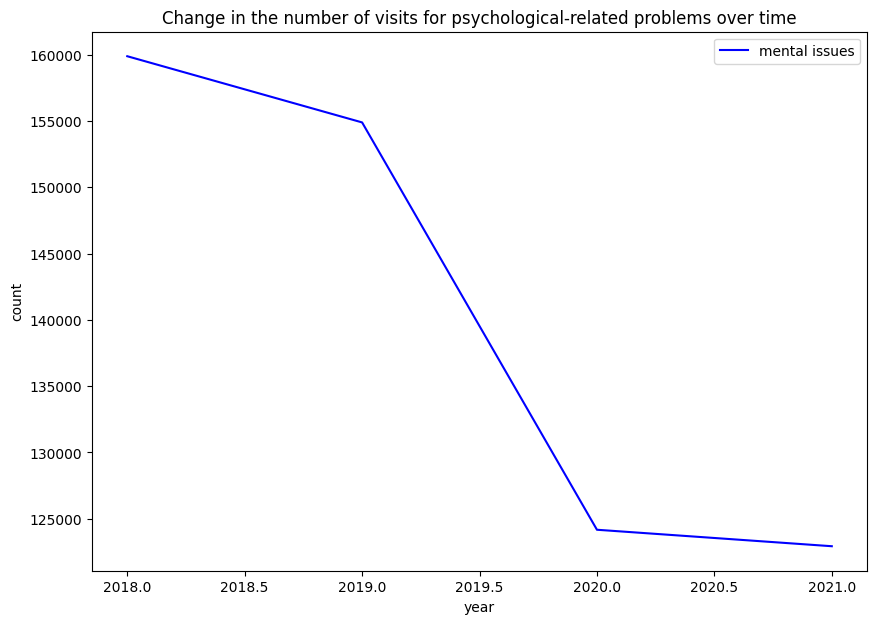

In [28]:
fig = plt.figure(figsize=(10,7))
plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues", c = 'b')
# plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all")
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of visits for psychological-related problems over time")
plt.legend()
plt.show()

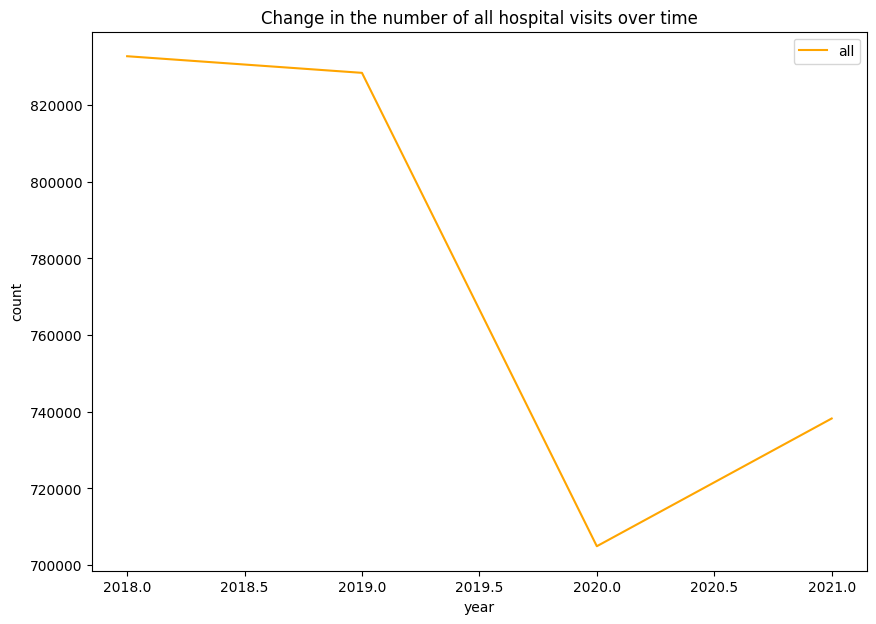

In [29]:
fig = plt.figure(figsize=(10,7))
#plt.plot(df_mental_year.index, df_mental_year['Operating Certificate Number'], label="mental issues")
plt.plot(df_year.index, df_year['Operating Certificate Number'], label="all", c = 'orange')
plt.xlabel("year")
plt.ylabel("count")
plt.title("Change in the number of all hospital visits over time")
plt.legend()
plt.show()

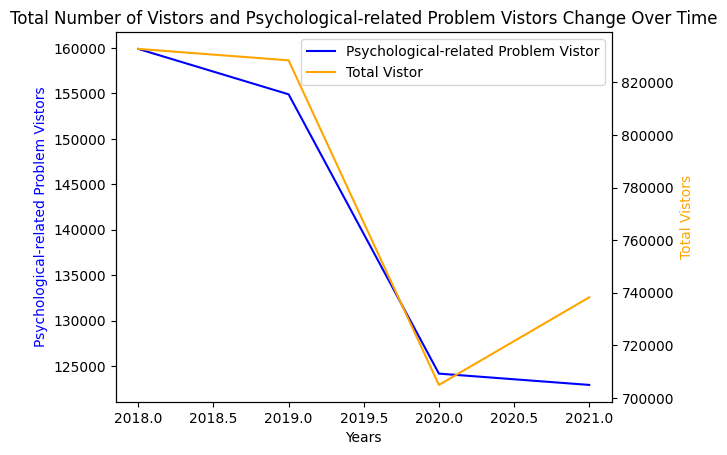

In [30]:
#fig = plt.figure(figsize=(10,7))
X = df_year.index
y1 = df_mental_year['Operating Certificate Number']
y2 = df_year['Operating Certificate Number']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
l1, = ax1.plot(X, y1, 'b-',label = 'Psychological-related Problem Vistor')
l2, = ax2.plot(X, y2, '-', color = 'orange', label = 'Total Vistor')
plt.title('Total Number of Vistors and Psychological-related Problem Vistors Change Over Time')

ax1.set_xlabel('Years')
ax1.set_ylabel('Psychological-related Problem Vistors', color='b')
ax2.set_ylabel('Total Vistors', color = 'orange')
plt.legend([l1,l2],['Psychological-related Problem Vistor','Total Vistor'])
plt.show()

In [31]:
# df[['Discharge Year','Operating Certificate Number']].groupby(by=['Discharge Year']).count().plot.bar()

In [32]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [33]:
merged_df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'zip code'],
      dtype='object')

In [34]:
merged_df = merged_df[['zip code','Discharge Year','Gender','Race','Age Group']]
merged_df = merged_df.set_index('zip code')
merged_df.head()

,Discharge Year,Gender,Race,Age Group
zip code,,,,
10037,2018,F,Black/African American,50 to 69
10037,2018,F,Black/African American,50 to 69
10037,2018,F,Black/African American,50 to 69
10037,2018,F,Black/African American,18 to 29
10037,2018,M,Black/African American,70 or Older


In [35]:
# 对性别信息进行标签编码
le = LabelEncoder()
merged_df["Gender"] = le.fit_transform(merged_df["Gender"])
merged_df["Race"] = le.fit_transform(merged_df["Race"])
merged_df.head()

,Discharge Year,Gender,Race,Age Group
zip code,,,,
10037,2018,0,0,50 to 69
10037,2018,0,0,50 to 69
10037,2018,0,0,50 to 69
10037,2018,0,0,18 to 29
10037,2018,1,0,70 or Older


In [36]:
merged_df["Race"].unique()

array([0, 2, 3, 1])

In [37]:
# checkpoint-age
merged_df["Age Group"].unique()

array(['50 to 69', '18 to 29', '70 or Older', '30 to 49', '0 to 17'],
      dtype=object)

In [38]:
merged_df['Age Group'] = merged_df['Age Group'].apply(lambda x: int(str(x)[:2]))
merged_df.head()

,Discharge Year,Gender,Race,Age Group
zip code,,,,
10037,2018,0,0,50
10037,2018,0,0,50
10037,2018,0,0,50
10037,2018,0,0,18
10037,2018,1,0,70


In [39]:
merged_df['Discharge Year'].unique()

array([2018, 2019, 2020, 2021])

In [40]:
merged_df["Age Group"].unique()

array([50, 18, 70, 30,  0])

In [41]:
# 使用 MinMaxScaler 对 DataFrame 进行归一化
scaler = MinMaxScaler()
merged_df_normalized = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)
dataIncome_normalized = pd.DataFrame(scaler.fit_transform(dataIncome), columns=dataIncome.columns)

In [42]:
merged_df_normalized.head()

,Discharge Year,Gender,Race,Age Group
0,0.0,0.0,0.0,0.714286
1,0.0,0.0,0.0,0.714286
2,0.0,0.0,0.0,0.714286
3,0.0,0.0,0.0,0.257143
4,0.0,0.5,0.0,1.000000


In [43]:
# 使用 set_index() 方法将merged_df_的索引设置为第一个 merged_df_normalized 的索引
merged_df_normalized = merged_df_normalized.set_index(merged_df.index)
merged_df_normalized.head()

,Discharge Year,Gender,Race,Age Group
zip code,,,,
10037,0.0,0.0,0.0,0.714286
10037,0.0,0.0,0.0,0.714286
10037,0.0,0.0,0.0,0.714286
10037,0.0,0.0,0.0,0.257143
10037,0.0,0.5,0.0,1.000000


In [44]:
len(merged_df_normalized)

3106076

In [45]:
# checkpoint-year
merged_df_normalized['Discharge Year'].unique()

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [46]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Boilers,Bottled Water,Bridge Condition,Broken Muni Meter,Broken Parking Meter,Building Condition,Building/Use,Bus Stop Shelter Placement,CONSTRUCTION,Calorie Labeling,City Vehicle Placard Complaint,Collection Truck Noise,Construction,Consumer Complaint,Cranes and Derricks,Curb Condition,DOF Parking - Tax Exemption,DPR Internal,Damaged Tree,Dead Tree,Derelict Bicycle,Derelict Vehicle,Derelict Vehicles,Dirty Conditions,Disorderly Youth,Drinking,Drinking Water,EAP Inspection - F59,ELECTRIC,Electrical,Elevator,Emergency Response Team (ERT),Fire Alarm - Addition,Fire Alarm - Modification,Fire Alarm - New System,Fire Alarm - Reinspection,Fire Alarm - Replacement,Fire Safety Director - F58,Food Establishment,Food Poisoning,For Hire Vehicle Complaint,Found Property,GENERAL,GENERAL CONSTRUCTION,General Construction/Plumbing,Graffiti,HEATING,Harboring Bees/Wasps,Hazardous Materials,Hazmat Storage/Use,Highway Condition,Highway Sign - Damaged,Highway Sign - Dangling,Highway Sign - Missing,Homeless Encampment,Homeless Person Assistance,Illegal Animal Kept as Pet,Illegal Animal Sold,Illegal Fireworks,Illegal Parking,Illegal Tree Damage,Indoor Air Quality,Indoor Sewage,Industrial Waste,Investigations and Discipline (IAD),Lead,Legal Services Provider Complaint,Lifeguard,Literature Request,Litter Basket / Request,Maintenance or Facility,Miscellaneous Categories,Missed Collection (All Materials),Mold,Municipal Parking Facility,NONCONST,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Non-Residential Heat,Open Flame Permit,Other Enforcement,Overflowing Litter Baskets,Overgrown Tree/Branches,PAINT - PLASTER,PAINT/PLASTER,PLUMBING,Panhandling,Plant,Plumbing,Poison Ivy,Portable Toilet,Posting Advertisement,Public Assembly,Public Assembly - Temporary,Public Payphone Complaint,Public Toilet,Radioactive Material,Rangehood,Recycling Enforcement,Rodent,Root/Sewer/Sidewalk Condition,SCRIE,STRUCTURAL,Sanitation Condition,Scaffold Safety,School Maintenance,Senior Center Complaint,Sewer,Sidewalk Condition,Smoking,Snow,Special Enforcement,Special Natural Area District (SNAD),Special Projects Inspection Team (SPIT),Sprinkler - Mechanical,Squeegee,Stalled Sites,Standing Water,Standpipe - Mechanical,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Summer Camp,Sweeping/Missed-Inadequate,Tattooing,Taxi Complaint,Traffic,Traffic Signal Condition,Trans Fat,Transportation Provider Complaint,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.070175,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.008772,0.017544,0.000000,0.000000,0.000000,0.000000,0.008772,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298246,0.026316,0.000000,0.000000,0.000000,0.

In [47]:
#merge income data with 311
DataIncome1=dataIncome_normalized.merge(data311,left_index=True,right_index=True)
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Boilers,Bottled Water,Bridge Condition,Broken Muni Meter,Broken Parking Meter,Building Condition,Building/Use,Bus Stop Shelter Placement,CONSTRUCTION,Calorie Labeling,City Vehicle Placard Complaint,Collection Truck Noise,Construction,Consumer Complaint,Cranes and Derricks,Curb Condition,DOF Parking - Tax Exemption,DPR Internal,Damaged Tree,Dead Tree,Derelict Bicycle,Derelict Vehicle,Derelict Vehicles,Dirty Conditions,Disorderly Youth,Drinking,Drinking Water,EAP Inspection - F59,ELECTRIC,Electrical,Elevator,Emergency Response Team (ERT),Fire Alarm - Addition,Fire Alarm - Modification,Fire Alarm - New System,Fire Alarm - Reinspection,Fire Alarm - Replacement,Fire Safety Director - F58,Food Establishment,Food Poisoning,For Hire Vehicle Complaint,Found Property,GENERAL,GENERAL CONSTRUCTION,General Construction/Plumbing,Graffiti,HEATING,Harboring Bees/Wasps,Hazardous Materials,Hazmat Storage/Use,Highway Condition,Highway Sign - Damaged,Highway Sign - Dangling,Highway Sign - Missing,Homeless Encampment,Homeless Person Assistance,Illegal Animal Kept as Pet,Illegal Animal Sold,Illegal Fireworks,Illegal Parking,Illegal Tree Damage,Indoor Air Quality,Indoor Sewage,Industrial Waste,Investigations and Discipline (IAD),Lead,Legal Services Provider Complaint,Lifeguard,Literature Request,Litter Basket / Request,Maintenance or Facility,Miscellaneous Categories,Missed Collection (All Materials),Mold,Municipal Parking Facility,NONCONST,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Non-Residential Heat,Open Flame Permit,Other Enforcement,Overflowing Litter Baskets,Overgrown Tree/Branches,PAINT - PLASTER,PAINT/PLASTER,PLUMBING,Panhandling,Plant,Plumbing,Poison Ivy,Portable Toilet,Posting Advertisement,Public Assembly,Public Assembly - Temporary,Public Payphone Complaint,Public Toilet,Radioactive Material,Rangehood,Recycling Enforcement,Rodent,Root/Sewer/Sidewalk Condition,SCRIE,STRUCTURAL,Sanitation Condition,Scaffold Safety,School Maintenance,Senior Center Complaint,Sewer,Sidewalk Condition,Smoking,Snow,Special Enforcement,Special Natural Area District (SNAD),Special Projects Inspection Team (SPIT),Sprinkler - Mechanical,Squeegee,Stalled Sites,Standing Water,Standpipe - Mechanical,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Summer Camp,Sweeping/Missed-Inadequate,Tattooing,Taxi Complaint,Traffic,Traffic Signal Condition,Trans Fat,Transportation Provider Complaint,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
10000.0,0.172862,0.135845,0.080999,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.070175,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.008772,0.017544,0.000000,0.000000,0.000000,0.000000,0.008772,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298246,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.017544,0.000000,0.0,

In [48]:
len(DataIncome1)

179

In [49]:
#merge income data with merged_df

merged_df_ = pd.merge(merged_df_normalized,DataIncome1, left_index=True,right_index=True, how='left')
merged_df_.head()

,Discharge Year,Gender,Race,Age Group,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Boilers,Bottled Water,Bridge Condition,Broken Muni Meter,Broken Parking Meter,Building Condition,Building/Use,Bus Stop Shelter Placement,CONSTRUCTION,Calorie Labeling,City Vehicle Placard Complaint,Collection Truck Noise,Construction,Consumer Complaint,Cranes and Derricks,Curb Condition,DOF Parking - Tax Exemption,DPR Internal,Damaged Tree,Dead Tree,Derelict Bicycle,Derelict Vehicle,Derelict Vehicles,Dirty Conditions,Disorderly Youth,Drinking,Drinking Water,EAP Inspection - F59,ELECTRIC,Electrical,Elevator,Emergency Response Team (ERT),Fire Alarm - Addition,Fire Alarm - Modification,Fire Alarm - New System,Fire Alarm - Reinspection,Fire Alarm - Replacement,Fire Safety Director - F58,Food Establishment,Food Poisoning,For Hire Vehicle Complaint,Found Property,GENERAL,GENERAL CONSTRUCTION,General Construction/Plumbing,Graffiti,HEATING,Harboring Bees/Wasps,Hazardous Materials,Hazmat Storage/Use,Highway Condition,Highway Sign - Damaged,Highway Sign - Dangling,Highway Sign - Missing,Homeless Encampment,Homeless Person Assistance,Illegal Animal Kept as Pet,Illegal Animal Sold,Illegal Fireworks,Illegal Parking,Illegal Tree Damage,Indoor Air Quality,Indoor Sewage,Industrial Waste,Investigations and Discipline (IAD),Lead,Legal Services Provider Complaint,Lifeguard,Literature Request,Litter Basket / Request,Maintenance or Facility,Miscellaneous Categories,Missed Collection (All Materials),Mold,Municipal Parking Facility,NONCONST,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Non-Residential Heat,Open Flame Permit,Other Enforcement,Overflowing Litter Baskets,Overgrown Tree/Branches,PAINT - PLASTER,PAINT/PLASTER,PLUMBING,Panhandling,Plant,Plumbing,Poison Ivy,Portable Toilet,Posting Advertisement,Public Assembly,Public Assembly - Temporary,Public Payphone Complaint,Public Toilet,Radioactive Material,Rangehood,Recycling Enforcement,Rodent,Root/Sewer/Sidewalk Condition,SCRIE,STRUCTURAL,Sanitation Condition,Scaffold Safety,School Maintenance,Senior Center Complaint,Sewer,Sidewalk Condition,Smoking,Snow,Special Enforcement,Special Natural Area District (SNAD),Special Projects Inspection Team (SPIT),Sprinkler - Mechanical,Squeegee,Stalled Sites,Standing Water,Standpipe - Mechanical,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Summer Camp,Sweeping/Missed-Inadequate,Tattooing,Taxi Complaint,Traffic,Traffic Signal Condition,Trans Fat,Transportation Provider Complaint,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
10003.0,0.0,0.5,0.000000,0.714286,0.196604,0.151637,0.018075,0.001331,0.000089,0.01269,0.0,0.000177,0.003905,0.00213,0.001154,0.000177,0.000177,0.001242,0.006123,0.00142,0.0,0.0,0.129648,0.000089,0.0,0.005946,0.000355,0.000355,0.000177,0.000355,0.000266,0.000266,0.016062,0.000355,0.000266,0.001509,0.000444,0.003993,0.000976,0.002928,0.001509,0.00142,0.014376,0.000444,0.001864,0.0,0.002218,0.012246,0.002485,0.002485,0.000089,0.0,0.000266,0.000444,0.001065,0.000089,0.008785,0.013045,0.005679,0.002751,0.00142,0.001331,0.03097,0.026001,0.010826,0.095483,0.0,0.002662,0.0,0.0,0.0,0.0,0.0,0.016683,0.004614,0.000089,0.000177,0.000089,0.019434,0.002396,0.004792,0.000355,0.000799,0.00071,0.001864,0.0,0.0,0.0,0.003993,0.003372,0.001864,0.006833,0.000621,0.0,0.019345,0.091667,0.054308,0.000444,0.000177,0.007543,0.035939,0.008963,0.001154,0.000355,0.004259,0.001154,0.002662,0.025468,0.000976,0.031769,0.000266,0.0,0.001509,0.000089,0.0,0.000177,0.0,0.0,0.000444,0.

In [50]:
len(merged_df_)

3106076

In [51]:
data = merged_df_[['Discharge Year','Gender','Race','Age Group','Street Condition','HEATING','Air Quality','Graffiti','Dirty Conditions','Industrial Waste','Homeless Encampment','Noise',
             'Overgrown Tree/Branches','Overflowing Litter Baskets','PAINT/PLASTER','Sidewalk Condition','Water Quality']]
data = data.rename(columns={'Street Condition': 'Location'})
data.head()

,Discharge Year,Gender,Race,Age Group,Location,HEATING,Air Quality,Graffiti,Dirty Conditions,Industrial Waste,Homeless Encampment,Noise,Overgrown Tree/Branches,Overflowing Litter Baskets,PAINT/PLASTER,Sidewalk Condition,Water Quality
10003.0,0.0,0.5,0.000000,0.714286,0.050759,0.095483,0.01269,0.010826,0.014376,0.000799,0.016683,0.091667,0.002662,0.001154,0.000976,0.005768,0.000444
10003.0,0.0,0.5,0.000000,0.714286,0.050759,0.095483,0.01269,0.010826,0.014376,0.000799,0.016683,0.091667,0.002662,0.001154,0.000976,0.005768,0.000444
10003.0,0.0,0.5,1.000000,0.714286,0.050759,0.095483,0.01269,0.010826,0.014376,0.000799,0.016683,0.091667,0.002662,0.001154,0.000976,0.005768,0.000444
10003.0,0.0,0.5,0.000000,0.428571,0.050759,0.095483,0.01269,0.010826,0.014376,0.000799,0.016683,0.091667,0.002662,0.001154,0.000976,0.005768,0.000444
10003.0,0.0,0.0,0.666667,0.714286,0.050759,0.095483,0.01269,0.010826,0.014376,0.000799,0.016683,0.091667,0.002662,0.001154,0.000976,0.005768,0.000444


In [52]:
len(data)

3106076